# Projeto 2 - Ciência dos Dados


# Predição de sucesso de um jogo na Steam

Alunos:

Luka Siqueira Ferreira de Figueiredo

Joao Pedro de Soua Costa Ferreira




<div id="introducao"></div>

# Introdução



## O que é a Steam?


O Steam foi lançado em 2003 pela produtora Valve, como um serviço para vender jogos digitais, dos mais variados – basicamente, uma loja online. 
Fonte:https://www.techtudo.com.br/noticias/2019/02/o-que-e-steam-conheca-a-loja-de-jogos-para-pc-da-valve.ghtml




## Sistema de Notas



  A Steam utiliza um sistema de avaliações chamado Metacritic pega a média de inúmeros sites que avaliam jogos, essas são contadas e formam uma nota média.




Este projeto tem como finalidade prever uma variável principal em função de demais outras variáveis que podem influenciar em seu comportamento, foi decidido prever se a nota de um jogo novo na Steam considerando as suas características e outras variáveis.

<div id="imports"></div>

# Importando Bibliotecas necessárias

In [41]:


%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from IPython.display import Image

# Biblioteca de decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from scipy.stats import linregress
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.tree import export_graphviz
import pydot
from graphviz import render
import datetime


In [42]:
filename = 'Steam_games.xlsx'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir com o projeto!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()} :(')

Encontrei o arquivo Steam_games.xlsx, tudo certo para prosseguir com o projeto!


<div id="sobredf"></div>

# Sobre a base de Dados

A base dados contém algumas informações coletadas de vários pacientes no momento do exame. A seguir, estão descritas as informações originais contidas no dataset:
<ol>
<li>Id: id do jogo(será retirada do dataset pois não importa para a análise).</li>
<li>Name: nome do jogo .</li>
<li>Metacritic: Nota na Steam( do Metacritic)</li>
<li>Genres: Genero do jogo</li>
<li>Franchise: Franquia que o Jogo faz parte(será retirada do dataset pois não importa para a análise)</li>
<li>Platform: Platformas em que o jogo esta disponivel</li>
<li>originalCost: Preço Original do jogo</li>
<li>Players: Como os jogaodres podem jogar o Jogo(online,solo...)</li>
<li>Languages: linguas em que o jogo esta disponivel(será retirada do dataset pois não importa para a análise)</li>


</ol>
Id: Id relacionado ao jogo para indentificar ele

Name: é somente o nome do jogo.

Metacritic: As avaliações da Steam são notas dadas de 0 a 1000,essas avaliações sao baseadas em uma media feito pelo Metacritic.
Genres: Genero do jogo, isso da mostra que tipo de experiencia fosse pode ter com o jogo, bastante similar a generos de jogos sao bastantes similares a de filmes com exemplos temos açao, horror entre outro.

Franchise: Essa variavel que nao vai ser utilizada porem darua a franquia que pertence o jogo por exeplo FIFA 21 fais parte da franquia FIFA assim com Call of Duty: WWII faz parte da franquia Call of Duty.

Platform: Platformas em que o jogo esta disponivel por exemplo Windows ou MacOS.

originalCost: Preço Original do jogo no momento em que a pesquisa foi feita

Players: Como os jogaodres podem jogar o Jogo, por exemplo se é um jogo somente singleplayer ou ce tem aspectos multiplayer ou cooperativo tambem

Languages:linguas no qual o jogo foi traduzido para





# Target, Features e mudanças principais para a base de dados


    Target: Definimos como target prever uma nota para um jogo na Steam(Metacritic)

    Mudanças necessárias:
- Deletamos algumas colunas descenserarias
-Para isso utilizamos de um dataset que foi encontrado na internet, esse é uma base de dados composta por um arquivo xlsx, que contém dados sobre mais de 40 mil jogos, esses dados vêm diretamente da Steam, bem como 2 modelos de predição (decision tree,random forest) que nos ajudarão a responder a pergunta!




## Base de dados original



In [43]:
steam =  pd.read_excel(filename)
steam

,Column1,Name,Metacritic,Genres,Franchise,Platform,OriginalCost,Players,Languages
0,0,Counter-Strike: Global Offensive,830.0,"Action, Free to Play",NaN,"PC, Xbox 360, PlayStation 3",Free to Play,"multiplayer, pvp, coop, online coop","English, Czech, Danish, Dutch, Finnish, French..."
1,1,Destiny 2,820.0,"Action, Adventure, Free to Play",Destiny,"PlayStation 5, Web, Xbox Series X, PC, Xbox On...",Free To Play,"multiplayer, coop, online coop","English, French, Italian, German, Japanese, Ko..."
2,2,Dota 2,900.0,NaN,NaN,"Linux, macOS, PC",Free to Play,"multiplayer, pvp, coop, online coop","English, Bulgarian, Czech, Danish, Dutch, Finn..."
3,3,The Elder Scrolls Online,710.0,"Massively Multiplayer, RPG","The Elder Scrolls, Skyrim",PC,$19.99,"singleplayer, multiplayer, coop","English, French, German, Russian"
4,4,Sea of Thieves,680.0,"Action, Adventure",NaN,"PC, Xbox One",$39.99,"multiplayer, pvp, coop, online coop","English, French, Italian, German, Russian"
...,...,...,...,...,...,...,...,...,...
30245,30245,Thirty Two,NaN,"Casual, Indie",NaN,PC,$0.99,NaN,English
30246,30246,Highlight (itch),NaN,Indie,NaN,PC,$0.99,NaN,English
30247,30247,HappyBlock,NaN,Casual,LydGame Happy,PC,$1.99,NaN,English
30248,30248,Bubble Rush,NaN,"Action, Adventure, Casual, Indie",NaN,PC,$0.99,NaN,English




## Modificando base de dados 



In [44]:
games = steam.drop('Franchise',axis=1).drop('Languages',axis=1).drop('Column1',axis=1).copy()


In [45]:
games = games.dropna()
games = games.reset_index(drop=True) # correção necessaria para reorganizar os index das linhas 

games

,Name,Metacritic,Genres,Platform,OriginalCost,Players
0,Counter-Strike: Global Offensive,830.0,"Action, Free to Play","PC, Xbox 360, PlayStation 3",Free to Play,"multiplayer, pvp, coop, online coop"
1,Destiny 2,820.0,"Action, Adventure, Free to Play","PlayStation 5, Web, Xbox Series X, PC, Xbox On...",Free To Play,"multiplayer, coop, online coop"
2,The Elder Scrolls Online,710.0,"Massively Multiplayer, RPG",PC,$19.99,"singleplayer, multiplayer, coop"
3,Sea of Thieves,680.0,"Action, Adventure","PC, Xbox One",$39.99,"multiplayer, pvp, coop, online coop"
4,Tom Clancy's Rainbow Six Siege,750.0,Action,"PlayStation 4, PC, Xbox One",$19.99,"singleplayer, multiplayer, coop, online coop"
...,...,...,...,...,...,...
2330,Metroid: Zero Mission,890.0,"Action, Indie, Early Access","Game Boy Advance, Wii U",$1.99,singleplayer
2331,Crookz - The Big Heist,740.0,"Adventure, Casual, Indie","macOS, iOS, Linux, PC",$3.99,singleplayer
2332,NARUTO TO BORUTO: SHINOBI STRIKER,620.0,Action,"PC, Xbox One, PlayStation 4",$2.99,singleplayer
2333,The Fall Part 2: Unbound,720.0,"Action, Casual, Indie, RPG, Simulation, Strategy","PC, macOS, Linux, PlayStation 4, Xbox One, Nin...",$0.99,singleplayer


## Mudanças na coluna "OriginalCost"

In [46]:
games.OriginalCost = games.OriginalCost.str.extract('(\d+)').astype(float).fillna(0)

## Dividindo as colunas "Players", "Genres" e "Platform" e criando novas colunas


In [47]:
#Genres
textog=",".join(games.Genres)
textog=textog.split(",")
lista_gen=[]
for el in textog:
    if el not in lista_gen and el[0]!=" ":
        lista_gen.append(el)

for elem in lista_gen:
    filtrod=games.Genres.str.contains(f"{elem}")
    games.loc[filtrod,f"{elem}"]=filtrod

In [48]:
#Platform
textplat=",".join(games.Platform)
textplat=textplat.split(",")
lista_plat=[]
for el in textplat:
    if el not in lista_plat and el[0]!=" ":
        lista_plat.append(el)

for ele in lista_plat:
    filtrodd=games.Platform.str.contains(f"{ele}")
    games.loc[filtrodd,f"{ele}"]=filtrodd

In [49]:
#Players
textplayers=",".join(games.Players)
textplayers=textplayers.split(",")
lista_players=[]
for el in textplayers:
    if el not in lista_players and el[0]!=" ":
        lista_players.append(el)

for ele in lista_players:
    filtroddd=games.Players.str.contains(f"{ele}")
    games.loc[filtroddd,f"{ele}"]=filtroddd

In [50]:
del games["Players"]
del games["Genres"]
del games["Platform"]

games = games.replace(np.nan, False, regex=True)

## Descrição da tabela final





Metacritic: Nota dada pelo site Metacritic até 1000 pontos, sendo, quanto maior, melhor.

Genres: Gêneros em que o jogo pode ser classificado. 

Platform: Plataformas em que o jogo está disponivel. 

OriginalCost: Preço (em dólares americanos) do jogo no momento em que os dados foram coletados.

Players: Modos de jogo disponíveis para o jogo ser jogado.




## Gráficos


# Quantidade por nota na Steam(Metacritic)

Text(0.5, 1.0, 'Quantidade de jogos por nota')

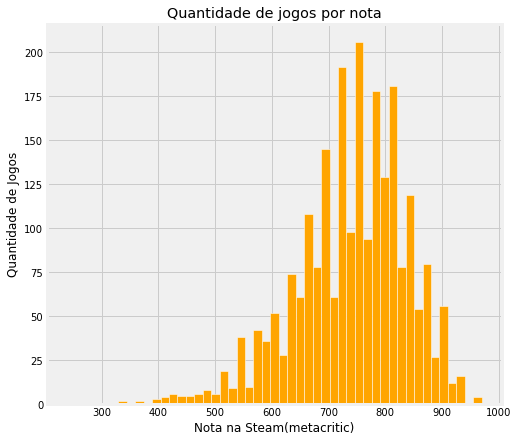

In [51]:
notas_inicial=games.Metacritic

faixas_notas = np.linspace(notas_inicial.min(),notas_inicial.max(),50)

plt.figure(figsize=(16, 7))

plt.subplot(121)
plt.hist(notas_inicial, bins=faixas_notas,color='orange', edgecolor='white')
plt.ylabel('Quantidade de Jogos')
plt.xlabel('Nota na Steam(metacritic)')
plt.title('Quantidade de jogos por nota')

### Nota do Metacritic por preço na data de lançamento, quantidade de achievements, quantidade de citações sobre o jogo na internet e quantidade de linguas em que o jogo está disponível

Text(0, 0.5, 'Nota na Steam(Metacritic)')

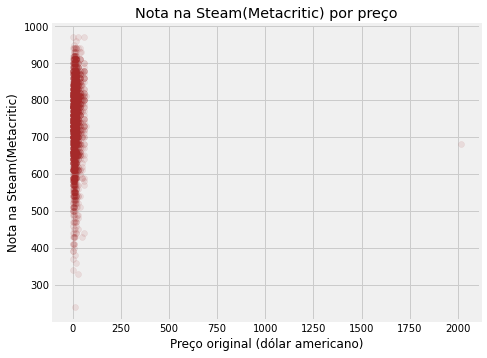

In [52]:
plt.figure(figsize=(15, 12))

plt.subplot(221)
plt.scatter(games.OriginalCost,games.Metacritic, c='brown', alpha=0.1)
plt.title('Nota na Steam(Metacritic) por preço')
plt.xlabel('Preço original (dólar americano)')
plt.ylabel('Nota na Steam(Metacritic)')



## Divisa da base de dados na parte treinamento e na parte teste

In [53]:

# Separa o dataframe para aplicar a função.

# Faz uma copia do dataframe sem a variável que queremos prever.
X = games.drop('Metacritic',axis=1).drop('Name',axis=1).copy()

# Faz uma copia apenas da variavel que vamos prever.
y = games.Metacritic.copy()
feature_list = list(X.columns)

# Separa cada um dos dois dataframes em treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2) 

## Decision Tree

In [54]:
modelo = DecisionTreeRegressor(min_samples_split=10, random_state=2) #min_samples_split cria o mínimo de amostras necessaria para a criação de um novo node
modelo = modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
comparacao = pd.DataFrame({'Real_Values':y_test, 'valores_previstos':y_pred})


## Graficos de valores previstos por valores reais


(500.0, 1000.0)

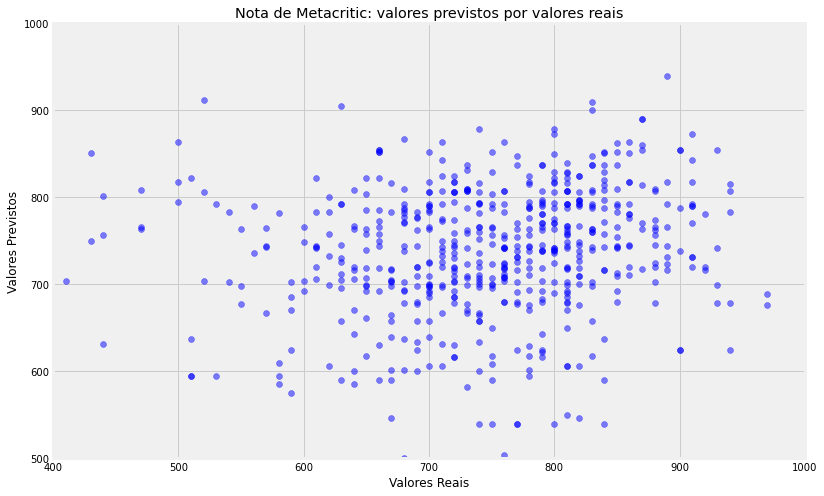

In [55]:
plt.figure(figsize=(12, 8))
plt.scatter(comparacao.Real_Values,comparacao.valores_previstos,color="blue" ,alpha=0.5)
plt.title('Nota de Metacritic: valores previstos por valores reais')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.xlim(400, 1000)
plt.ylim(500, 1000)

## Valores previstos por valores reais

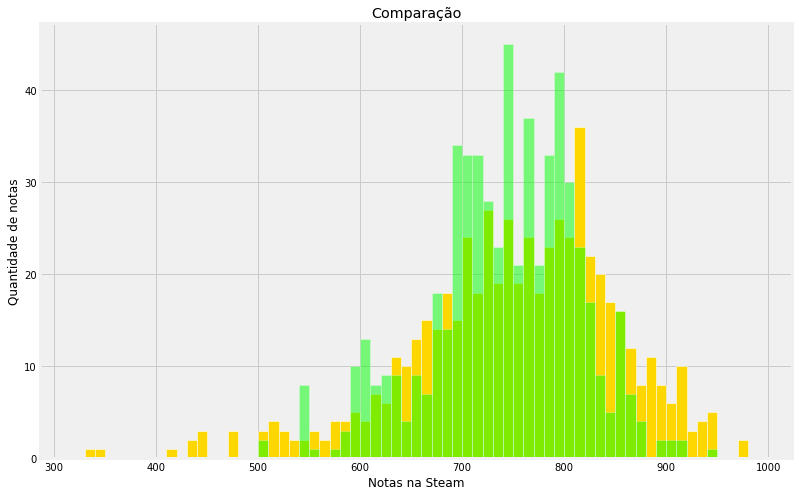

In [56]:
plt.figure(figsize=(12, 8))
plt.subplot(111)
faixas= np.arange(320,1000,10)
plt.title("Comparação")
plt.ylabel("Quantidade de notas")
plt.xlabel("Notas na Steam")
plt.hist(comparacao.Real_Values,bins=faixas,color="gold" ,edgecolor='white')

plt.hist(comparacao.valores_previstos,bins=faixas,color="lime" ,edgecolor='white',alpha=0.5)
plt.show()

## Validação

In [57]:

errors = abs(y_pred - y_test,)
gth = 100 * (errors / y_test)

# Calcula e mostra a precisão (accuracy) e tipos de erros
accuracy = 100 - np.mean(gth)

print('MEDIDAS DE PRECISÃO:')
print()
print('Erro Médio Absoluto:', round(np.mean(errors), 2), 'graus.')
print('Precisão:', round(accuracy, 2), '%.')
print('Erro Médio Absoluto:', metrics.mean_absolute_error(y_test, y_pred))
print('Erro Quadrático Médio:', metrics.mean_squared_error(y_test, y_pred))
print('Raiz do erro quadrático médio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MEDIDAS DE PRECISÃO:

Erro Médio Absoluto: 87.84 graus.
Precisão: 87.27 %.
Erro Médio Absoluto: 87.84000597956077
Erro Quadrático Médio: 13573.405874659606
Raiz do erro quadrático médio: 116.50496072983161
R2: -0.32015747069191325


## Random Forest


In [58]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, random_state=2)

sc = StandardScaler()
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)

regressor = RandomForestRegressor(n_estimators=1000, random_state=42)
regressor.fit(X2_train, y2_train)
y2_pred = regressor.predict(X2_test)

# Usa o método de previsão no teste 
predicao = regressor.predict(X2_test,)

# Calcula os erros absolutos
errors2 = abs(predicao - y2_test,)

In [59]:

gth2 = 100 * (errors2 / y2_test)

# Calcula e mostra a precisão (accuracy) e tipos de erros
accuracy2 = 100 - np.mean(gth2)
print('-'*50)
print('MEDIDAS DE PRECISÃO:')
print()
print('Precisão das previsões:', round(accuracy2, 2), '%.')
print('Média dos erros absolutos:', metrics.mean_absolute_error(y2_test, y2_pred))
print('Média dos erros ao quadrado:', metrics.mean_squared_error(y2_test, y2_pred))
print('Raíz da média dos erros ao quadrado:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))
print('R2:', metrics.r2_score(y2_test, y2_pred))
print('-'*50)

--------------------------------------------------
MEDIDAS DE PRECISÃO:

Precisão das previsões: 88.41 %.
Média dos erros absolutos: 80.39848960495645
Média dos erros ao quadrado: 10633.154810778175
Raíz da média dos erros ao quadrado: 103.11718969589006
R2: -0.034186915951520236
--------------------------------------------------


In [60]:
tree = regressor.estimators_[5]

# Exporta a imagem
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Usa o arquivo criado para criar um gráfico
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Extrai o peso (importância) de cada coluna
importances = list(regressor.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

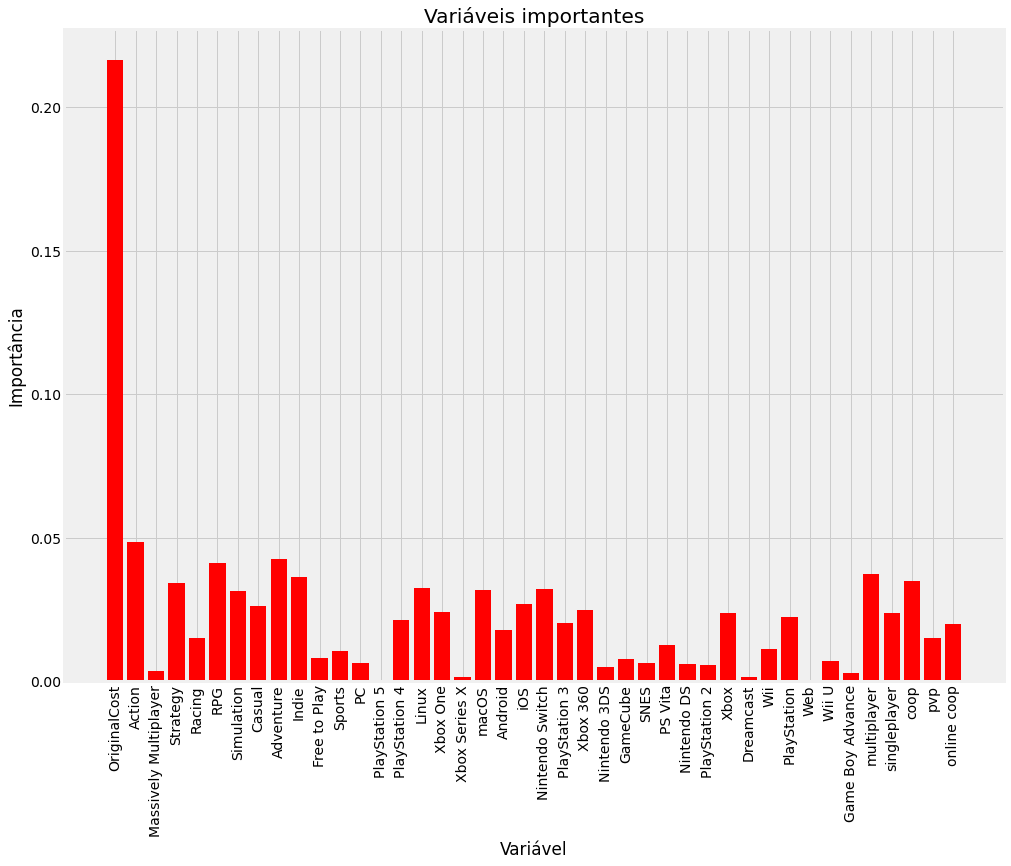

In [61]:
# Faz o gráfico de barras das variáveis por sua respectiva importância
plt.figure(figsize=(15, 12))
plt.style.use('fivethirtyeight')
x2_values = list(range(len(importances)))
plt.bar(x2_values, importances, orientation = 'vertical',color='red')
plt.xticks(x2_values, feature_list, rotation='vertical')
plt.ylabel('Importância'); plt.xlabel('Variável'); plt.title('Variáveis importantes');

## Análise

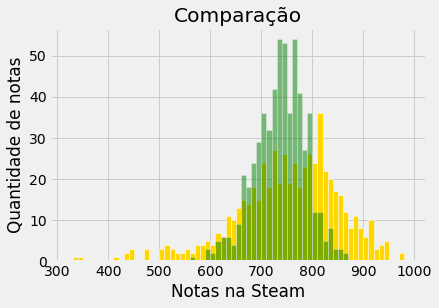

In [62]:
# Cria uma coluna que compara os valors reais e os previstos
comparara2 = pd.DataFrame({'Real_Values':y_test, 'valores_previstos':predicao})

# Diz quantas das colunas os valores previstos são os mesmos que os reais
comparado = comparacao.Real_Values == comparacao.valores_previstos
plt.subplot(111)
plt.title("Comparação")
plt.ylabel("Quantidade de notas")
plt.xlabel("Notas na Steam")
plt.hist(comparacao.Real_Values,bins=faixas,color="gold" ,edgecolor='white')

plt.hist(predicao,bins=faixas,color="green" ,edgecolor='white',alpha=0.5)
plt.show()

Text(0, 0.5, 'Valores Previstos')

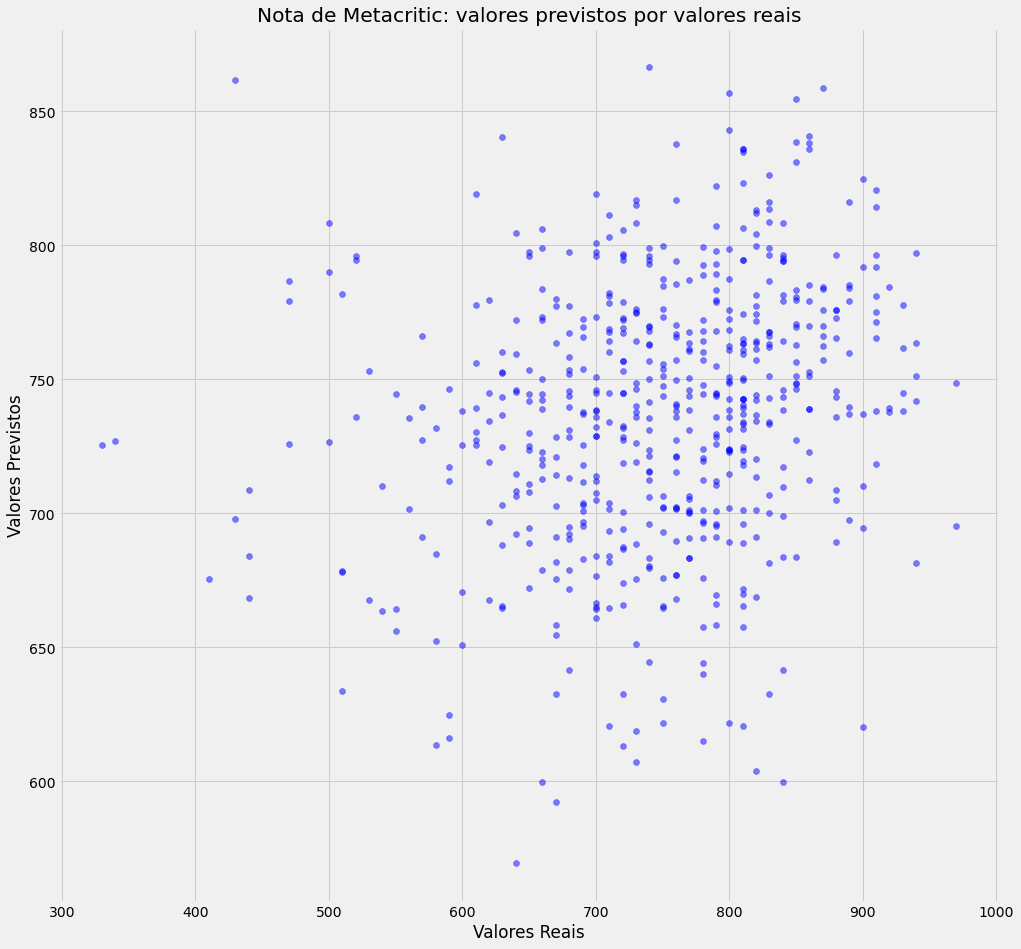

In [63]:
stats = linregress(comparacao.Real_Values, predicao)

m = stats.slope
b = stats.intercept

plt.figure(figsize=(15, 15))

plt.scatter(comparacao.Real_Values,predicao,color="blue" ,alpha=0.5)
plt.title('Nota de Metacritic: valores previstos por valores reais')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')

## Conclusão

Podemos concluir que os modelos tiveram sucesso, devido a sua precisao de 88.41 %, mais ainda pode ser melhorado, como por exemplo tendo um desvio padrão  maior ou utilizando as colunas que foram deixadas de lado com mais informaçao, porem a precisao mudaria pouco ja que podemos ver que a coluna Metacritic, que contia as notas é de longe a mais influente.


## Referências:

Estruturação do código
https://ensinandomaquinasblog.wordpress.com/2017/12/15/modelos-preditivos-de-notas-de-redacao-do-enem-2015/

Random Forest e Random Forest

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

https://towardsdatascience.com/machine-learning-basics-decision-tree-regression-1d73ea003fda